In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
os.chdir('D:\Data\Kaggle')
os.getcwd()

'D:\\Data\\Kaggle'

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')

In [5]:
sample.head()
test.head()
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
train.shape

(7613, 5)

In [9]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
train.drop(['location'],axis=1,inplace=True)

In [11]:
train.head()
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

<AxesSubplot:>

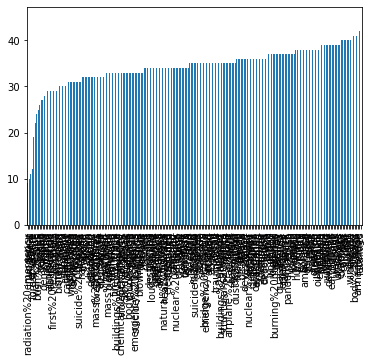

In [12]:
train['keyword'].value_counts().sort_values().plot(kind='bar')

# Word Count

In [13]:
train['words_count']=[len(x.split())for x in train['text'].tolist()]
train[['text','words_count']].head()

,text,words_count
0,Our Deeds are the Reason of this #earthquake M...,13
1,Forest fire near La Ronge Sask. Canada,7
2,All residents asked to 'shelter in place' are ...,22
3,"13,000 people receive #wildfires evacuation or...",8
4,Just got sent this photo from Ruby #Alaska as ...,16


In [14]:
#import nltk
#nltk.download()

In [15]:
import nltk
nltk.download('stopwords')
stopword=nltk.corpus.stopwords.words('english')
print(stopword)
print(len(stopword))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\608729464\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
train['stopwords']= train['text'].apply(lambda x:len([x for x in x.split() if x in stopword]))
train[['text','stopwords']].head()

,text,stopwords
0,Our Deeds are the Reason of this #earthquake M...,5
1,Forest fire near La Ronge Sask. Canada,0
2,All residents asked to 'shelter in place' are ...,9
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,6


In [17]:
train['hashtag']= train['text'].apply(lambda x:len([x for x in x.split() if x.startswith('@')]))
train[['text','hashtag']].head()

,text,hashtag
0,Our Deeds are the Reason of this #earthquake M...,0
1,Forest fire near La Ronge Sask. Canada,0
2,All residents asked to 'shelter in place' are ...,0
3,"13,000 people receive #wildfires evacuation or...",0
4,Just got sent this photo from Ruby #Alaska as ...,0


In [18]:
train['numerics']= train['text'].apply(lambda x:len([x for x in x.split() if x.isdigit()]))
train[['text','numerics']].head()
train.head()

,id,keyword,text,target,words_count,stopwords,hashtag,numerics
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,5,0,0
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,7,0,0,0
2,5,NaN,All residents asked to 'shelter in place' are ...,1,22,9,0,0
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,0,0
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,6,0,0


In [19]:
train['upper']= train['text'].apply(lambda x:len([x for x in x.split() if x.isupper()]))
train[['text','upper']].head()

,text,upper
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,0
2,All residents asked to 'shelter in place' are ...,0
3,"13,000 people receive #wildfires evacuation or...",0
4,Just got sent this photo from Ruby #Alaska as ...,0


# Basic Preprocessing

In [20]:
train['text']=train['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
train.head()

,id,keyword,text,target,words_count,stopwords,hashtag,numerics,upper
0,1,NaN,our deeds are the reason of this #earthquake m...,1,13,5,0,0,1
1,4,NaN,forest fire near la ronge sask. canada,1,7,0,0,0,0
2,5,NaN,all residents asked to 'shelter in place' are ...,1,22,9,0,0,0
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,0,0,0
4,7,NaN,just got sent this photo from ruby #alaska as ...,1,16,6,0,0,0


# Removal of punctuation

In [21]:
train['text']=train['text'].str.replace('[^\w\s]','')
train.head()

,id,keyword,text,target,words_count,stopwords,hashtag,numerics,upper
0,1,NaN,our deeds are the reason of this earthquake ma...,1,13,5,0,0,1
1,4,NaN,forest fire near la ronge sask canada,1,7,0,0,0,0
2,5,NaN,all residents asked to shelter in place are be...,1,22,9,0,0,0
3,6,NaN,13000 people receive wildfires evacuation orde...,1,8,1,0,0,0
4,7,NaN,just got sent this photo from ruby alaska as s...,1,16,6,0,0,0


# Removal of Stopword

In [22]:
train['text']= train['text'].apply(lambda x:" ".join(x for x in x.split() if x not in stopword))
train['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

# Removal of Common Words

In [23]:
freq=pd.Series(' '.join(train['text']).split()).value_counts()[:30]
freq

like          345
im            299
amp           298
fire          250
get           229
new           224
via           220
people        196
news          193
one           192
dont          191
video         165
us            164
2             159
emergency     157
disaster      152
police        140
would         131
still         129
body          124
burning       120
back          119
crash         118
storm         117
california    117
suicide       116
time          112
got           112
know          112
buildings     110
dtype: int64

In [24]:
freq=['2']
train['text']=train['text'].apply(lambda x: " ". join(x for x  in x.split() if x not in freq))
train['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [25]:
#from nltk.stem import PorterStemmer
#st=PorterStemmer()
nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()
train['text'][:2].apply(lambda x:" ".join([wn.lemmatize(word) for word in x.split()]))
train.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\608729464\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,keyword,text,target,words_count,stopwords,hashtag,numerics,upper
0,1,NaN,deeds reason earthquake may allah forgive us,1,13,5,0,0,1
1,4,NaN,forest fire near la ronge sask canada,1,7,0,0,0,0
2,5,NaN,residents asked shelter place notified officer...,1,22,9,0,0,0
3,6,NaN,13000 people receive wildfires evacuation orde...,1,8,1,0,0,0
4,7,NaN,got sent photo ruby alaska smoke wildfires pou...,1,16,6,0,0,0


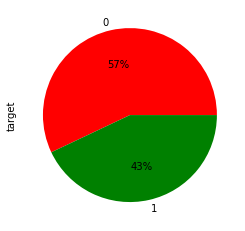

In [26]:
train.target.value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['red','green']);

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7613 non-null   int64 
 1   keyword      7552 non-null   object
 2   text         7613 non-null   object
 3   target       7613 non-null   int64 
 4   words_count  7613 non-null   int64 
 5   stopwords    7613 non-null   int64 
 6   hashtag      7613 non-null   int64 
 7   numerics     7613 non-null   int64 
 8   upper        7613 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 535.4+ KB


In [28]:
processed_features=train['text']
labels=train['target']
processed_features

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [29]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
t_vect=TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8)
processed_data=t_vect.fit_transform(train['text'])

In [31]:
t_vect

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(processed_data,labels,test_size=0.2,random_state=0)

In [33]:
y_train

1386    0
4048    1
3086    0
272     0
7462    0
       ..
4931    0
3264    1
1653    1
2607    0
2732    0
Name: target, Length: 6090, dtype: int64

In [34]:
from time import time
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [35]:
classifiers=[tree.DecisionTreeClassifier(random_state=1),RandomForestClassifier(n_estimators=200),LogisticRegression(max_iter=1000),LinearDiscriminantAnalysis()]

In [36]:
df_method_score=pd.DataFrame(columns=['classifier','train_score','test_score','training_time'])
for classifier in classifiers:
    string='training'
    string+=classifier.__class__.__name__
    print(string)
    ts=time()
    classifier.fit(X_train.toarray(),y_train)
    te=time()-ts
    trn_score=classifier.score(X_train.toarray(),y_train)
    score=classifier.score(X_test.toarray(),y_test)
    
    df_method_score=df_method_score.append({'classifier':classifier.__class__.__name__,'train_score':round(100*trn_score,2),
                                          'test_score':round(100*score,2),'training_time':te },ignore_index=True)

trainingDecisionTreeClassifier
trainingRandomForestClassifier
trainingLogisticRegression
trainingLinearDiscriminantAnalysis


In [37]:
df_method_score['score_diff']=df_method_score['train_score']-df_method_score['test_score']
df_method_score

,classifier,train_score,test_score,training_time,score_diff
0,DecisionTreeClassifier,98.00,74.33,73.431926,23.67
1,RandomForestClassifier,98.00,78.79,184.533663,19.21
2,LogisticRegression,85.98,80.11,0.533239,5.87
3,LinearDiscriminantAnalysis,89.24,75.57,8.523942,13.67


<AxesSubplot:xlabel='test_score', ylabel='classifier'>

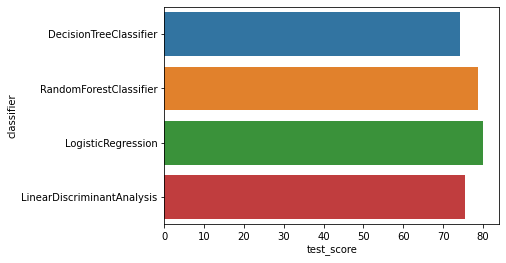

In [38]:
import seaborn as sns
sns.barplot(y='classifier',x='test_score',data=df_method_score)

# LogisticRegression

In [43]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_train_predict=lr.predict(X_train)
model_score=lr.score(X_train,y_train)
print(model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8597701149425288
[[3234  222]
 [ 632 2002]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      3456
           1       0.90      0.76      0.82      2634

    accuracy                           0.86      6090
   macro avg       0.87      0.85      0.85      6090
weighted avg       0.86      0.86      0.86      6090

